In [221]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [222]:
import os
os.environ['PYGLET_HEADLESS'] = "true"

In [279]:
policy_num = 16
map_num = 21

In [280]:
from envs.miniworld.constants import OBJ_MAP, OBSTACLE_MARKER, BLOCK_SCALE, OBJECT_SIZE
obs_offset = BLOCK_SCALE / 2
sq_offset = OBJECT_SIZE * BLOCK_SCALE / 2
def read_miniworld_map(map_file):
    shapes = []
    height = 0
    width = 0
    with open(map_file, 'r') as f:
        map_mat = f.readlines()
    size = len(map_mat)
    print(size)
    for i, l in enumerate(map_mat):
        # I don't consider empty lines!
        l_stripped = l.rstrip()
        if len(l.rstrip()) == 0: continue

        # this is not an empty line!
        height += 1
        for j, e in enumerate(l_stripped):
            if e in OBJ_MAP.keys():
                Entity, color = OBJ_MAP[e]
                if color == "yellow": color = "orange"
                if e == OBSTACLE_MARKER:
                    shapes.append(plt.Rectangle((j - obs_offset, size - 1 - i - obs_offset), BLOCK_SCALE, BLOCK_SCALE, fc=color))
                elif Entity.__name__ == "Ball":
                    shapes.append(plt.Circle((j, size - 1 - i), BLOCK_SCALE * OBJECT_SIZE / 2, fc=color))
                elif Entity.__name__ == "Box":
                    shapes.append(plt.Rectangle((j - sq_offset, size - 1 - i - sq_offset), BLOCK_SCALE * OBJECT_SIZE, BLOCK_SCALE * OBJECT_SIZE, fc=color))

        width = max(width, len(l_stripped))
    return shapes, height, width

In [281]:
# df = pd.read_csv("success_map copy.csv")
# df = pd.read_csv("results/miniworld_minecraft/sequence_p1.0/lpopl_dsac/map10/6/success_map.csv")

import json
import gzip

path = os.environ['HOME'] + f"/data/shared/ltl-transfer-ts/saves/miniworld_simp_no_vis_spot_p1.0/mixed_50/dsac/map{map_num}/0/classifier/uniform_seed0/policy{policy_num}_rollout.json.gz"

with gzip.open(path, 'rt') as fp:
    data = json.load(fp)

df_orig = pd.DataFrame.from_dict(
    data['results'], 
    orient='index')

In [282]:
df = df_orig.reset_index()
df['x'] = df['index'].apply(lambda x: x.split(', ')[0]).astype(float)
df['y'] = df['index'].apply(lambda x: x.split(', ')[1]).astype(float)
df['angle'] = df['index'].apply(lambda x: x.split(', ')[2]).astype(float)
del df['index']
df

,success,true_proposition,steps,final_state,self_edge,edge,x,y,angle
0,False,,1500,"[3.9988887394336023, 1.111771432346219, 195.00...",!a&!g,!a&!g,2.25,1.5,0.0
1,False,,1500,"[4.593777613376963, 1.0729485755808408, 195.00...",!a&!g,!a&!g,3.00,1.5,0.0
2,False,,1500,"[5.488666487320323, 1.0341257188154627, 195.00...",!a&!g,!a&!g,3.75,1.5,0.0
3,False,,1500,"[5.9488887394336025, 1.111771432346219, 195.00...",!a&!g,!a&!g,4.50,1.5,0.0
4,False,,1500,"[6.6988887394336025, 1.111771432346219, 195.00...",!a&!g,!a&!g,5.25,1.5,0.0
...,...,...,...,...,...,...,...,...,...
1150,False,,1500,"[10.5, 13.5, 44.99999999999983]",!a&!g,!a&!g,10.50,13.5,270.0
1151,False,,1500,"[11.25, 13.5, 59.999999999999886]",!a&!g,!a&!g,11.25,13.5,270.0
1152,False,,1500,"[12.0, 13.5, 59.999999999999886]",!a&!g,!a&!g,12.00,13.5,270.0
1153,False,,1500,"[12.75, 13.5, 74.99999999999983]",!a&!g,!a&!g,12.75,13.5,270.0


In [283]:
from envs.miniworld.world import BLOCK_SCALE
map_file = f"../experiments/maps/map_{map_num}.txt"
offset = 0.5
shapes, height, width = read_miniworld_map(map_file)

df_rot = df.copy()
df_rot['x'] = df_rot['x'] * BLOCK_SCALE
df_rot['y'] = height - df_rot['y'] * BLOCK_SCALE - 1
# df_rot['i'] = height - df_rot['i'] - 1
# df_rot['j'] = width - df_rot['j']

15


In [284]:
df.head()

,success,true_proposition,steps,final_state,self_edge,edge,x,y,angle
0,False,,1500,"[3.9988887394336023, 1.111771432346219, 195.00...",!a&!g,!a&!g,2.25,1.5,0.0
1,False,,1500,"[4.593777613376963, 1.0729485755808408, 195.00...",!a&!g,!a&!g,3.00,1.5,0.0
2,False,,1500,"[5.488666487320323, 1.0341257188154627, 195.00...",!a&!g,!a&!g,3.75,1.5,0.0
3,False,,1500,"[5.9488887394336025, 1.111771432346219, 195.00...",!a&!g,!a&!g,4.50,1.5,0.0
4,False,,1500,"[6.6988887394336025, 1.111771432346219, 195.00...",!a&!g,!a&!g,5.25,1.5,0.0


In [285]:
a = data['ltl']

In [286]:
# from copilot
def convert_ltl(a):
    if isinstance(a, str):
        return a
    elif isinstance(a, list):
        if a[0] == "and":
            return " & ".join([convert_ltl(a_) for a_ in a[1:]])
        elif a[0] == "until":
            if a[1] == "True":
                return "F(" + convert_ltl(a[2]) + ")"
            else:
                return "U(" + convert_ltl(a[1]) + ", " + convert_ltl(a[2]) + ")"
        elif a[0] == "next":
            return "X(" + convert_ltl(a[1]) + ")"
        elif a[0] == "True":
            return "True"
        elif a[0] == "not":
            return "!" + convert_ltl(a[1])
        else:
            print(a)
            raise NotImplementedError
    else:
        raise NotImplementedError

In [287]:
convert_ltl(["and", ["until", "True", "a"], ["and", ["until", "True", "b"], ["and", ["until", "True", "d"], ["and", ["until", "True", "e"], ["and", ["until", "True", ["and", "a", ["until", "True", "d"]]]]]]]])

'F(a) & F(b) & F(d) & F(e) & F(a & F(d))'

In [288]:
convert_ltl(a)

'F(a) & F(g) & F(g & F(a)) & F(g & F(e)) & F(a & X(F(e)))'

In [289]:
df_rot['edge'].value_counts().keys()

Index(['a&!g', '!a&!g', 'g&!a&!e'], dtype='object', name='edge')

In [290]:
df_rot_new = df_rot.copy()
if "uniform" in path:
    df_rot_new.loc[df_rot_new['angle'] == 0, 'x'] += 0.15
    df_rot_new.loc[df_rot_new['angle'] == 90, 'y'] += 0.15
    df_rot_new.loc[df_rot_new['angle'] == 180, 'x'] -= 0.15
    df_rot_new.loc[df_rot_new['angle'] == 270, 'y'] -= 0.15

In [291]:
# df_success = df_rot[df_rot['success']]
# # df_half = df[df['final_ltl'] != df['task']]
# shapes, height, width = read_miniworld_map(map_file)

# ax = sns.scatterplot(data=df_rot_new, x="x", y="y", hue="edge", legend="brief", marker='.')
# sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
# for shape in shapes:
#     plt.gca().add_patch(shape)
# ax.set_xlim([-obs_offset, width-obs_offset])
# ax.set_ylim([-obs_offset, height-obs_offset])
# ax.set_aspect('equal', adjustable='box')
# ax.set_yticklabels([])
# ax.set_xticklabels([])
# plt.title("Success map for " + convert_ltl(a))
# # plt.text("")
# plt.show()

15
Box
Box


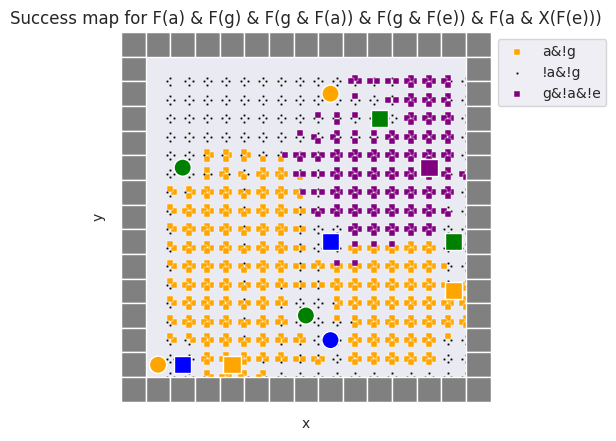

In [292]:
from envs.miniworld.constants import OBJ_MAP

df_success = df_rot_new[df_rot_new['success']]
# df_half = df[df['final_ltl'] != df['task']]
shapes, height, width = read_miniworld_map(map_file)

fig, ax = plt.subplots()

for edge in df_rot_new['edge'].value_counts().keys():
    # marker
    if edge[0] == "!":
        marker = "."
    elif OBJ_MAP[edge[0]][0].__name__ == "Ball":
        marker = "o"
    else:
        print(OBJ_MAP[edge[0]][0].__name__)
        marker = "s"
    
    # color
    if edge[0] != "!":
        color = OBJ_MAP[edge[0]][1]
    else:
        color = "black"
    # change yellow to orange so it's more legible
    if color == "yellow":
        color = "orange"
    ax = sns.scatterplot(
        data=df_rot_new[df_rot_new['edge'] == edge], 
        x="x", y="y", 
        c=[color],
        marker=marker,
        s=15,
        ax=ax,
        label=edge
    )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
# sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
for shape in shapes:
    ax.add_patch(shape)
ax.set_xlim([-obs_offset, width-obs_offset])
ax.set_ylim([-obs_offset, height-obs_offset])
ax.set_aspect('equal', adjustable='box')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Success map for " + convert_ltl(a))
# plt.text("")
plt.show()

15


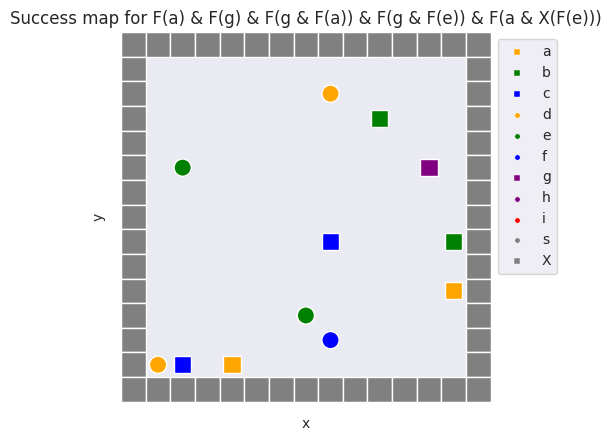

In [300]:
from envs.miniworld.constants import OBJ_MAP
import numpy as np
df_success = df_rot_new[df_rot_new['success']]
# df_half = df[df['final_ltl'] != df['task']]
shapes, height, width = read_miniworld_map(map_file)

fig, ax = plt.subplots()

for key, (shape, color) in OBJ_MAP.items():
    # marker
    if shape.__name__ == "Ball":
        marker = "o"
    else:
        marker = "s"
    
    # color
    # change yellow to orange so it's more legible
    if color == "yellow":
        color = "orange"
    ax = sns.scatterplot(
        data=pd.DataFrame.from_dict(dict(x=[1], y=[1])), 
        x="x", y="y", 
        c=[color],
        marker=marker,
        s=15,
        ax=ax,
        label=key
    )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
# sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
for shape in shapes:
    ax.add_patch(shape)
ax.set_xlim([-obs_offset, width-obs_offset])
ax.set_ylim([-obs_offset, height-obs_offset])
ax.set_aspect('equal', adjustable='box')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Success map for " + convert_ltl(a))
# plt.text("")
plt.show()